In [2]:
########################################
# Regression with statsmodel
#with numerical response variable
#and categorical explanatory variable
########################################
import pandas as pd 

fish = pd.read_csv("datasets/fish.csv")
display(fish.head(5))


,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


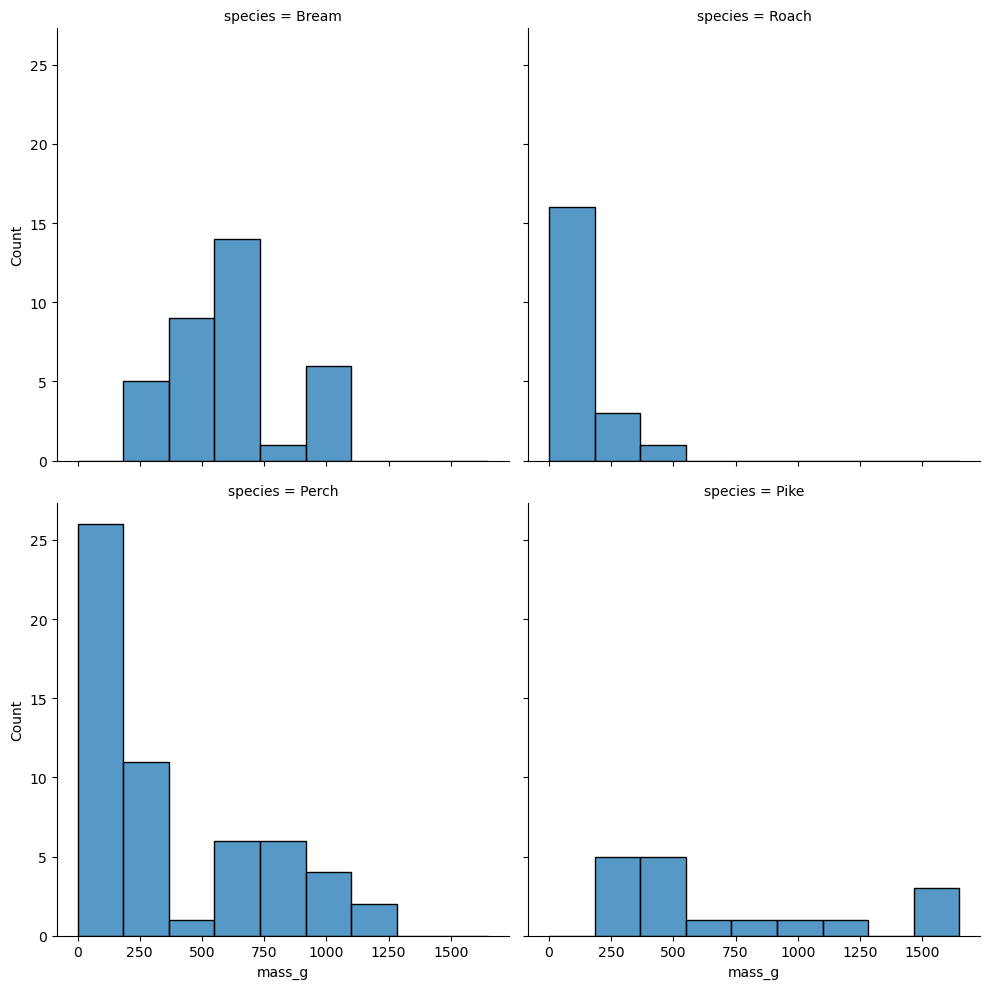

In [3]:
# Import seaborn with alias sns
import seaborn as sns
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

#visualization (scatter plot not ideal)
# one histogram for each species
sns.displot(data=fish, x="mass_g", col="species", col_wrap=2, bins=9)
plt.show()

In [4]:
#summary statistics
summary_stats = fish.groupby("species")["mass_g"].mean()
print(summary_stats)


#run a linear regression
from statsmodels.formula.api import ols
#coefficients relative to intercept
mdl_mass_vs_species = ols("mass_g ~ species", data=fish).fit()
print(mdl_mass_vs_species.params)

#with a single categorical explanatory variable
#the linear regression coefficient are the mean of each category
#coefficients relative to 0
mdl_mass_vs_species = ols("mass_g ~ species +0", data=fish).fit()
print(mdl_mass_vs_species.params)


species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64
Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64
species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


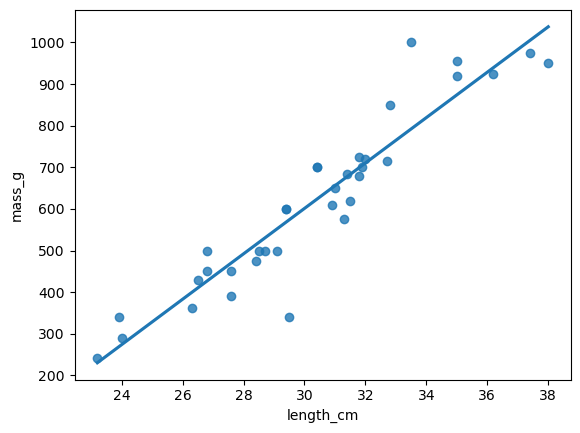

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [9]:
##################################################
#Using linear regression model to make prediction
##################################################

bream = fish[ fish["species"] == "Bream"]
print(bream.head())

#use the lenght of the fish to predict the mass of the fish
sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)
plt.show()

#before making prediction, create a fitted model
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_mass_vs_length.params)


    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


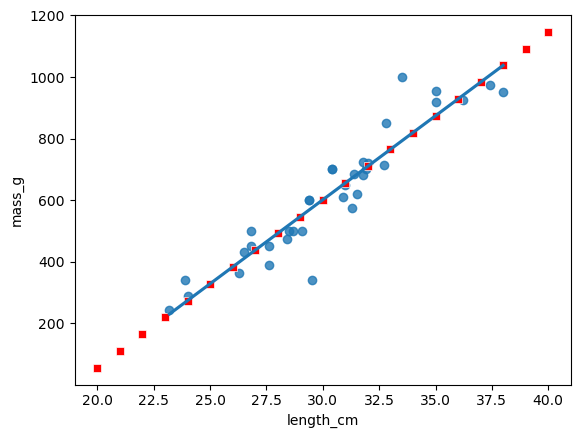

   length_cm      mass_g
0         10 -489.847756


In [14]:
import numpy as np
#create new explanatory data for predictions
explanatory_data = pd.DataFrame({"length_cm":np.arange(20,41)})
prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data))
print(prediction_data)

#showing predictions
fig = plt.figure()
sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)
sns.scatterplot(x="length_cm", y="mass_g", data=prediction_data, color="red", marker="s")
plt.show()

#Extrapolation
little_beam = pd.DataFrame({"length_cm": [10]})

pred_little_beam = little_beam.assign(mass_g = mdl_mass_vs_length.predict(little_beam))

print(pred_little_beam)
#the model perform porely here !!
#extrapolation can lead to ridiculous results


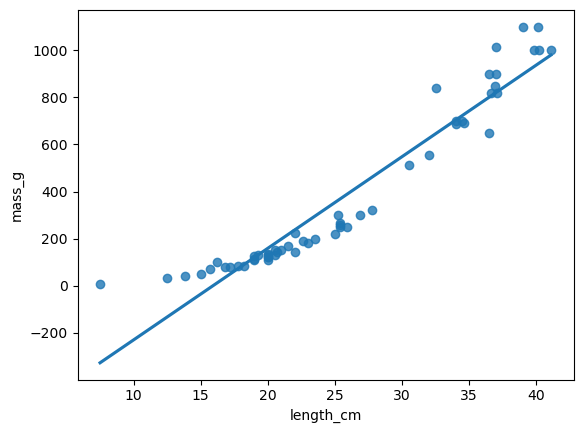

In [16]:
##############################
#not a linear relationship
##############################

perch = fish[ fish["species"] == "Perch"]
#print(perch.head())
sns.regplot(x="length_cm", y="mass_g", data =perch, ci=None)
plt.show()


/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_64696/3207094384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch["length_cm_cubed"] = perch["length_cm"] ** 3


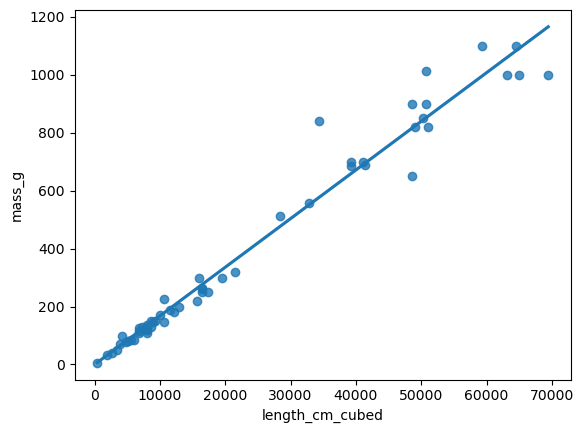

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64
   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


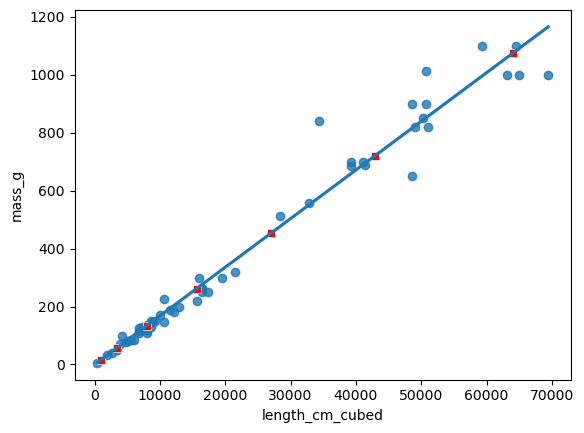

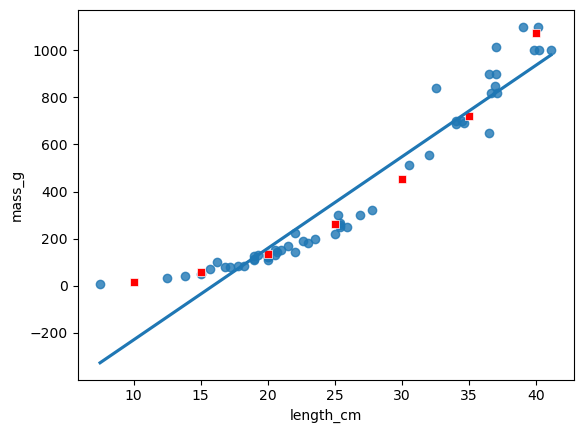

In [22]:
#################################
#Plotting mass vs. length cubed
#################################

perch["length_cm_cubed"] = perch["length_cm"] ** 3
sns.regplot(x="length_cm_cubed", y="mass_g", data =perch, ci=None)
plt.show()
                                 
#the data fit the line much better, we can now run a model

mdl_perch = ols("mass_g ~ length_cm_cubed", data=perch).fit()
print(mdl_perch.params)

explanatory_data = pd.DataFrame({"length_cm_cubed":np.arange(10,41,5)**3, "length_cm":np.arange(10,41,5)})
prediction_data = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data))
print(prediction_data)

fig =plt.figure()
sns.regplot(x="length_cm_cubed", y="mass_g", data=perch, ci=None)
sns.scatterplot(x="length_cm_cubed", y="mass_g", data=prediction_data, color="red", marker="s")
plt.show()    
#more interested on the original x-axis
fig =plt.figure()
sns.regplot(x="length_cm", y="mass_g", data=perch, ci=None)
sns.scatterplot(x="length_cm", y="mass_g", data=prediction_data, color="red", marker="s")
plt.show()    
#Notice how the red points curve upwards to follow the data. 
#the linear model has non-linear predictions, after the transformation is undone.


In [27]:
##########################
#Leverage and Influence
##########################
roach = fish[ fish["species"] == "Roach"]
mdl_roach = ols("mass_g ~ length_cm", data=roach).fit()
summary_roach = mdl_roach.get_influence().summary_frame()

roach["levarage"] = summary_roach["hat_diag"]
roach["cooks_dist"] = summary_roach["cooks_d"]
print(roach.sort_values("cooks_dist", ascending=False).head())

#First Line : Really short roach
#Second Line : Really long roach
#Thirs Line : Roach with 0 mass


   species  mass_g  length_cm  levarage  cooks_dist
35   Roach    40.0       12.9  0.313729    1.074015
54   Roach   390.0       29.5  0.394740    0.365782
40   Roach     0.0       19.0  0.061897    0.311852
52   Roach   290.0       24.0  0.099488    0.150064
51   Roach   180.0       23.6  0.088391    0.061209


/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_64696/3197617373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach["levarage"] = summary_roach["hat_diag"]
/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_64696/3197617373.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach["cooks_dist"] = summary_roach["cooks_d"]


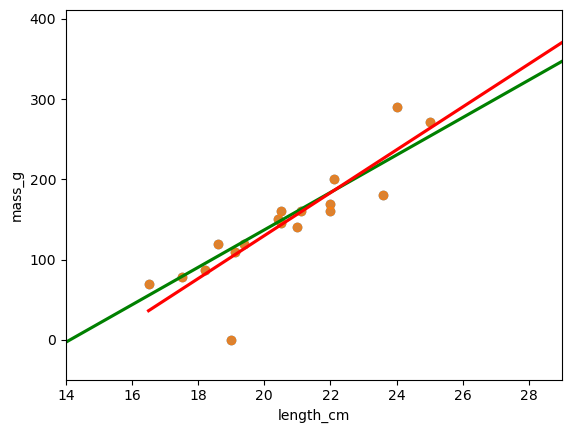

In [32]:
#########################################
#Removing the most influential roach
#########################################
roach_not_short = roach[roach["length_cm"] != 12.9]

sns.regplot(x="length_cm", y="mass_g", data=roach, ci=None, line_kws={"color":"green"})
sns.regplot(x="length_cm", y="mass_g", data=roach_not_short, ci=None, line_kws={"color":"red"})
plt.xlim(14,29)
plt.show()
